# Basic structures in python

This notebook provides a quick overview on the basic data sources of python.

Most of these have their equivalent in Matlab and other higher languages, so this should be a useful reminder. For example, `numpy.ones()` is the Matlab function equivalent of `ones()`.

The structure of this notebook is:

1. Vectors, matrices, dictionaries and lists
2. How to work with functions, loops and conditionals
3. Basics of plotting

After working your way through it, you should be able to work your way through the `Solow Model Example`.

In [48]:
# execute this cell before continuing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import division
%matplotlib inline
sns.set_style('whitegrid')

## 1. Vectors, matrices, dictionaries and lists
###Vectors

In computational economics you will be using vectors a lot!

In python we use Numpy Arrays, a structure that behaves as a vector. 

Here is the sintax (the magic words) to create and store a vector:

In [5]:
array1 = np.array([1,2,3])
array1

array([1, 2, 3])

Now we can do stuff with it, like add it to other vectors, mutiply it...

In [6]:
print array1*2
print array1+np.array([1,1,1])

[2 4 6]
[2 3 4]


Can also make matrices

In [9]:
matrix1 = np.array(([1,2,3],
                    [4,5,6],
                    [7,8,9]))  # Define a matrix, store it in matrix1
matrix1                        # Prints matrix1

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [14]:
print matrix1*2  # To multiply by a scalar, item by item
print matrix1**2 # To rise to a power, item by item

[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]
[[ 1  4  9]
 [16 25 36]
 [49 64 81]]


In [11]:
matrix2 = np.array(([1,0,0],
                    [0,1,0],
                    [0,0,1]))
matrix2 + matrix1

array([[ 2,  2,  3],
       [ 4,  6,  6],
       [ 7,  8, 10]])

In [30]:
print matrix2*matrix1          # multiplication element by element
print np.dot(matrix2,matrix1)  # matrix multiplication
print np.kron(matrix2,matrix1) # Kronecker product

[[1 0 0]
 [0 5 0]
 [0 0 9]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3 0 0 0 0 0 0]
 [4 5 6 0 0 0 0 0 0]
 [7 8 9 0 0 0 0 0 0]
 [0 0 0 1 2 3 0 0 0]
 [0 0 0 4 5 6 0 0 0]
 [0 0 0 7 8 9 0 0 0]
 [0 0 0 0 0 0 1 2 3]
 [0 0 0 0 0 0 4 5 6]
 [0 0 0 0 0 0 7 8 9]]


Special functions:
- `np.ones(n)`: Creates a vector of length `n` full of ones.
- `np.zeros(n)`: Creates a vector of length `n` full of zeros.
- `np.empty(n)`: Creates a vector of length `n` of empty values.

- `np.hstack((X,Y))`: Pastes vector (matrix) `X` and `Y` togehter, horizontally.
- `np.vstack((X,Y))`: Pastes vector (matrix) `X` and `Y` togehter, vertically.

In [20]:
np.hstack((matrix1,matrix2))

array([[1, 2, 3, 1, 0, 0],
       [4, 5, 6, 0, 1, 0],
       [7, 8, 9, 0, 0, 1]])

In [21]:
np.vstack((matrix1,matrix2))

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

Changing values inside a vector:

In [23]:
print array1
array1[2]=4
print array1

[1 2 3]
[1 2 4]


**Note:** Python counts from 0, Matlab counts from 1.

Suppose you have a starting vector (0,0,0) and you want to add new values 3 and 9. How do you do that?

In [26]:
vector0 = np.zeros(3)
vector0 = np.hstack((vector0,3,9))
vector0

array([ 0.,  0.,  0.,  3.,  9.])

Finally, selecting values: 


From matrix1 defined above pick the fist column and store it into col1:

 - `matrix1[:,0]` $ \rightarrow$ from matrix1, pick all ( : ) the rows  and the first ( 0 ) column.

In [27]:
col1 = matrix1[:,0]
col1

array([1, 4, 7])

## 2. How to work with functions, loops and conditionals
### Functions

To define a custon made function, the sintax is:

`def function_name(variable):
    result = f(variable)
    return result`
    
Notice the indentation (things below def are shifted to the right). Take an example:

In [31]:
def square(x):
    result = x**2
    return result

Now we can use out function:

In [33]:
print square(2)       # Square of a scalar (number)  
print square(array1)  # It works with arrays (vectors) too!

4
[ 1  4 16]


We can create functions that take more than one input.

For example, take a look at this function:

In [36]:
def k_star(s,n,g,delta,alpha):
    """Returns the BGP level of capital per effective worker""" # This will be printed if you type k_star? into a cell. Try it! 
    result = (s/(n+g+delta))**(1/1-alpha)
    return result  

In [38]:
k_star(0.1,0.01,0.05,0.09,0.33)

0.762112099102357

##Conditionals

Conditionals are very sueful structures. They check if a condition is met, and if it is, then they do something. They look like this:

In [39]:
if 4>0:   # 4 being greater than 0 is the condition
    print "Four is greater than 0"
else:     # In case the condition before fails
    print "WTF python"

Four is greater than 0


We can put them inside functions:

In [40]:
def even(x):
    if x%2==0:
        result = str(x)+" is even"  # string "x is even"
        return result
    else:
        result = str(x)+" is odd"
        return result

In [41]:
print even(7)
print even(800)

7 is odd
800 is even


## Loops

Another very useful structure. I'll talk about `for` loops here only. 

These can be used to do a certain action a number of times. For example:

In [44]:
for i in range(4):    #range(4) will give you [0,1,2,3], but means "do 4 times"
    print "Nananana"
print "Batman!"

Nananana
Nananana
Nananana
Nananana
Batman!


Or to perform operations with the elements of a vector or a list, for example:

In [45]:
starting_vector = np.empty(0)                          # Creates an empty vector

for i in range(4):
    starting_vector = np.hstack((starting_vector,i))   # Here we use the i for something, unlike the previous example
    print starting_vector                              # This shows us progress

[ 0.]
[ 0.  1.]
[ 0.  1.  2.]
[ 0.  1.  2.  3.]


##3. Basics of plotting

We can use the matplotlib module (impoted above) to plot functions.

The sintax goes like:

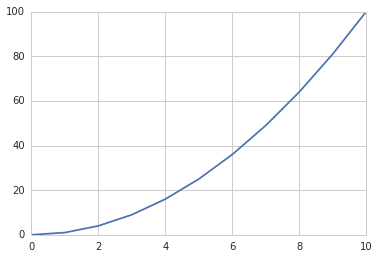

In [49]:
X = np.array(range(11))     # what will this give you?
Y = square(X)

plt.plot(X,Y)              # Plot a line passing though (x,y) points (both vectors must be the same length)
plt.show()                 # This is for showing the picture nicely

We can make this plot very fancy by playing around with the options of matplotlib. For example:

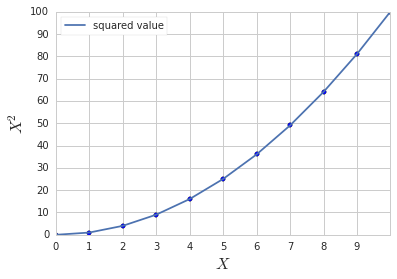

In [58]:
plt.plot(X,Y, label="squared value")   # label tells what to print in the legend
plt.scatter(X,Y, marker='o')           # this plots X and Y by drawing a cirlce in each point (no label, won't show in legend)
plt.ylabel("$X^2$", fontsize=16)       # label the y axis (notice the $$ signs)
plt.xlabel("$X$", fontsize=16)         # label the x axis (notice the $$ signs)
plt.legend(loc='best', frameon=True)   # show the legend, with a frame (Frameon=True), in the best location (loc='best')
plt.xlim(0,10)                         # sets the size of the x axis
plt.ylim(0,100)                        # sets the size of the y axis
plt.xticks(range(0,11))                # sets the ticks of the x axis
plt.yticks(range(0,110,10))            # sets the ticks of the y axis (range(0,110,10) tells to count from 0 to 110, 10 by 10)
plt.show()